In [1]:
import sys

# others will need to change the below line to point at broadbandequity directory
# this is necessary so that the jupyternotebook can load our package
sys.path[0] = '/Users/drewkeller/Desktop/CS/broadbandequity'

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
from data_pipeline import spatial_operations as so
import numpy as np
import pandas as pd
import geopandas as gpd

In [3]:
community_areas = so.get_shapefile('community_area').set_index("community_area").sort_index().reset_index()
community_areas

,community_area,area,area_num_1,area_numbe,comarea,comarea_id,perimeter,shape_area,shape_len,geometry
0,ALBANY PARK,0.0,14,14,0.0,0.0,0.0,5.354223e+07,39339.016439,"POLYGON ((-87.70404 41.97355, -87.70403 41.973..."
1,ARCHER HEIGHTS,0.0,57,57,0.0,0.0,0.0,5.592251e+07,31880.021029,"POLYGON ((-87.71437 41.82604, -87.71436 41.825..."
2,ARMOUR SQUARE,0.0,34,34,0.0,0.0,0.0,2.776620e+07,31948.598840,"POLYGON ((-87.62917 41.84556, -87.62947 41.845..."
3,ASHBURN,0.0,70,70,0.0,0.0,0.0,1.354603e+08,54818.154632,"POLYGON ((-87.71255 41.75734, -87.71252 41.757..."
4,AUBURN GRESHAM,0.0,71,71,0.0,0.0,0.0,1.050654e+08,46757.721716,"POLYGON ((-87.63990 41.75615, -87.63990 41.755..."
...,...,...,...,...,...,...,...,...,...,...
72,WEST LAWN,0.0,65,65,0.0,0.0,0.0,8.231530e+07,41934.490131,"POLYGON ((-87.71255 41.75734, -87.71278 41.757..."
73,WEST PULLMAN,0.0,53,53,0.0,0.0,0.0,9.936520e+07,50023.843001,"POLYGON ((-87.61828 41.65911, -87.61829 41.659..."
74,WEST RIDGE,0.0,2,2,0.0,0.0,0.0,9.842909e+07,43020.689458,"POLYGON ((-87.68465 42.01948, -87.68464 42.019..."
75,WEST TOWN,0.0,24,24,0.0,0.0,0.0,1.275629e+08,55203.718696,"POLYGON ((-87.65686 41.91078, -87.65685 41.910..."


In [ ]:
community_areas[56:57]

/Users/drewkeller/opt/anaconda3/envs/broadbandequity/lib/python3.8/site-packages/geopandas/plotting.py:38: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/Users/drewkeller/opt/anaconda3/envs/broadbandequity/lib/python3.8/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/Users/drewkeller/opt/anaconda3/envs/broadbandequity/lib/python3.8/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


<AxesSubplot:>

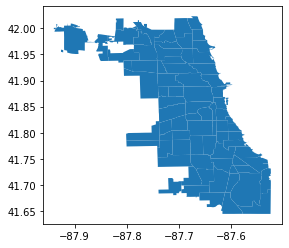

In [4]:
community_areas.plot()

In [ ]:
tracts = so.get_shapefile('tract')
tracts.plot()

We want to remove the part of the O'Hare community area that is not in tracts (that is, the tract that's not in Cook County).

In [ ]:
intersect = gpd.overlay(community_areas,tracts,how="intersection")
intersect.plot()

In [ ]:
intersect[intersect['community_area']=="OHARE"]

In [ ]:
intersect[intersect['community_area']=="OHARE"].dissolve(by="community_area").plot()

In [ ]:
community_areas[56:57]

In [ ]:
intersect[intersect['community_area']=="OHARE"].dissolve(by="community_area")["geometry"][0]

In [ ]:
community_areas["geometry"][56:57] = intersect[intersect['community_area']=="OHARE"].dissolve(by="community_area")["geometry"][0:1]

In [ ]:
community_areas.plot()

Nice. 

In [5]:
community_areas.to_file('/Users/drewkeller/Desktop/CS/broadbandequity/geo/community_areas.shp')